In [2]:
import yfinance as yf
import pandas as pd 
%matplotlib inline

univ = ['TSLA','SPY']
px = yf.download(univ, start="2021-01-01", auto_adjust=False)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
px

Ticker,SPY,TSLA
Date,,
2021-01-04,346.231201,243.256668
2021-01-05,348.615845,245.036667
2021-01-06,350.700043,251.993332
2021-01-07,355.910583,272.013336
2021-01-08,357.938446,293.339996
...,...,...
2025-07-21,628.770020,328.489990
2025-07-22,628.859985,332.109985
2025-07-23,634.210022,332.559998


In [4]:
def drawdown(px):
    return (px / px.expanding(min_periods=1).max() - 1)

In [5]:
dd = drawdown(px)

In [6]:
dd

Ticker,SPY,TSLA
Date,,
2021-01-04,0.0,0.000000
2021-01-05,0.0,0.000000
2021-01-06,0.0,0.000000
2021-01-07,0.0,0.000000
2021-01-08,0.0,0.000000
...,...,...
2025-07-21,0.0,-0.315446
2025-07-22,0.0,-0.307902
2025-07-23,0.0,-0.306965


<Axes: xlabel='Date'>

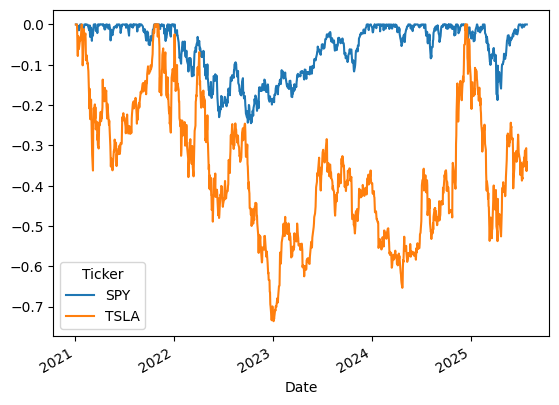

In [7]:
dd.plot()

In [8]:
dd.min()

Ticker
SPY    -0.244964
TSLA   -0.736322
dtype: float64

In [9]:
def duration(px):
    
    peak = px.expanding(min_periods=1).max()
    res = pd.DataFrame(index=px.index,columns=px.columns)
    
    for col in px.columns:
        for dt in px.index:
            
            if px.loc[dt,col] >= peak.loc[dt,col]:
                 res.loc[dt,col] = 0
    
            else:    
                res.loc[dt,col] = res.loc[:dt,col].iloc[-2] + 1

    return res

In [10]:
ddd = duration(px)

In [11]:
ddd

Ticker,SPY,TSLA
Date,,
2021-01-04,0,0
2021-01-05,0,0
2021-01-06,0,0
2021-01-07,0,0
2021-01-08,0,0
...,...,...
2025-07-21,0,145
2025-07-22,0,146
2025-07-23,0,147


<Axes: xlabel='Date'>

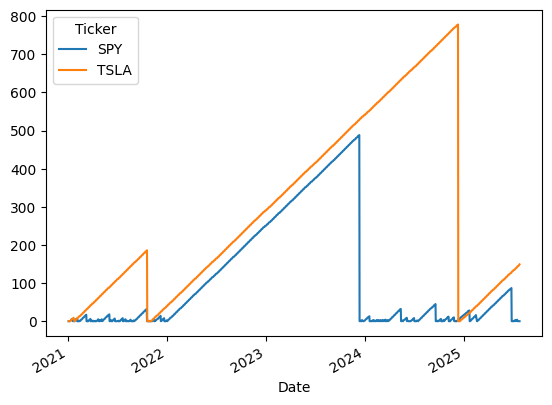

In [12]:
ddd.plot()

In [13]:
ddd.max()

Ticker
SPY     488
TSLA    778
dtype: object